In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from pandas import DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# загрузка набор данных Ирисы:
iris = datasets.load_iris()
# названия переменных
print(iris.feature_names)
# данные
print(iris.data[:10])
# целевая переменная
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
iris_frame = DataFrame(iris.data)
# обозначение колонок и целевых переменных
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


задача уменьшить количество признаков - уменьшить массив-матрицу данных для того чтобы найти лямбду ? 

найде лямбду можно найти собственные вектора
а что дальше? 

собственные вектора для каждого сорта или для всех сразу? 

что с ними делать дальше? 

если возьмем новый цветок и нам потребуется определить его сорт мы что будем делать? 

сравнивать? с чем? 

прогонять через что? 

как работает это? 




**Понижение размерности.**

In [4]:
U, s, W = np.linalg.svd(iris.data)

In [5]:
#Транспортируем матрицу W
V = W.T
V

array([[-0.75110816,  0.2841749 ,  0.50215472,  0.32081425],
       [-0.38008617,  0.5467445 , -0.67524332, -0.31725607],
       [-0.51300886, -0.70866455, -0.05916621, -0.48074507],
       [-0.16790754, -0.34367081, -0.53701625,  0.75187165]])

In [6]:
# s - список диагональных элементов, его нужно привести к виду диагональной матрицы
D = np.zeros_like(iris.data, dtype=float)
D[np.diag_indices(min(iris.data.shape))] = s

In [7]:
D[:4]

array([[95.95991387,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.46093093,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.88482631]])

In [8]:
#Убрали два нематериальных признака
for i,x in enumerate(D[2:]):
    for j,number in enumerate(x):
        if number != 0:
            D[i+2][j] = 0

In [9]:
D[:4]

array([[95.95991387,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [10]:
#Восстановили датасет с новой диагональной матрицей
new_iris = np.dot(np.dot(U,D),W)
new_iris

#понизили ранг до 2 х, но все равно пока находимся в 4 мерном пространстве, потому что 4 переменные.
#можем понизить размерность до 2х

array([[5.0952927 , 3.50597743, 1.40192232, 0.20165319],
       [4.74588049, 3.19610853, 1.46136967, 0.25800276],
       [4.68667405, 3.21586325, 1.30954904, 0.19452725],
       [4.61488457, 3.08894388, 1.46347879, 0.27002699],
       [5.07488651, 3.50623125, 1.36428119, 0.1863997 ],
       [5.52598407, 3.7330351 , 1.67566825, 0.28872322],
       [4.731593  , 3.2288014 , 1.36216771, 0.21446447],
       [5.00510918, 3.39830515, 1.47931372, 0.24418439],
       [4.37933538, 2.93134058, 1.38864652, 0.25618379],
       [4.80551481, 3.23360903, 1.48569239, 0.26393296],
       [5.39533378, 3.70766642, 1.49514864, 0.2183418 ],
       [4.89451945, 3.29088668, 1.51906398, 0.27146211],
       [4.67854319, 3.16443092, 1.41000708, 0.24052709],
       [4.30090163, 3.00174374, 1.08842179, 0.12739443],
       [5.73037625, 4.07476895, 1.2813685 , 0.09359359],
       [5.90310008, 4.12548386, 1.48153824, 0.16928199],
       [5.45240789, 3.81002345, 1.36951483, 0.15684908],
       [5.09813811, 3.49356935,

In [11]:
U, s, W = np.linalg.svd(new_iris)

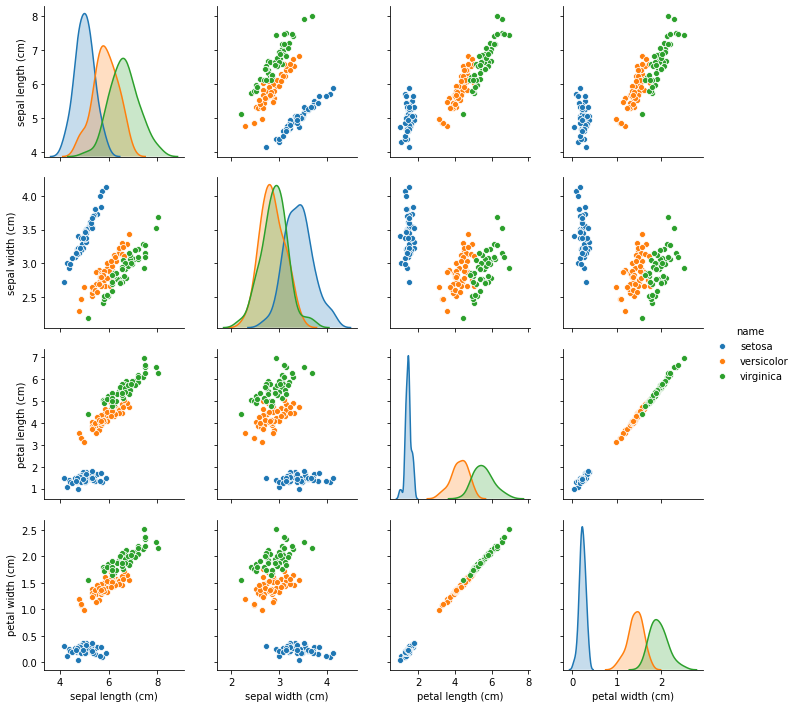

In [12]:
import seaborn as sns

iris_frame_2 = DataFrame(new_iris)
# обозначение колонок и целевых переменных
iris_frame_2.columns = iris.feature_names
# целевая переменная
iris_frame_2['target'] = iris.target
#для наглядности столбец с сортами
iris_frame_2['name'] = iris_frame_2.target.apply(lambda x : iris.target_names[x])

sns.pairplot(iris_frame_2[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

In [13]:
new_iris_cov = np.cov(new_iris.T)
print(f'Ковариационная матрица:\n {new_iris_cov}')
U_new, s_new, VT_new = np.linalg.svd(new_iris_cov)
print(f'Собственные значения:\n {s_new}')
print(f'Собственные векторы:\n {U_new}')

Ковариационная матрица:
 [[ 0.68222377 -0.0208085   1.28603382  0.52241054]
 [-0.0208085   0.13721124 -0.34521301 -0.15395272]
 [ 1.28603382 -0.34521301  3.10979132  1.2939947 ]
 [ 0.52241054 -0.15395272  1.2939947   0.53951014]]
Собственные значения:
 [4.22815554e+00 2.40580934e-01 1.56570345e-16 5.18627250e-17]
Собственные векторы:
 [[-0.36356257 -0.71605943 -0.07549559 -0.59108508]
 [ 0.08751286 -0.66010344  0.18914384  0.72168522]
 [-0.85655868  0.17801903 -0.33115419  0.35348743]
 [-0.35562761  0.1408246   0.92133703 -0.06953784]]


In [14]:
C = W.dot(new_iris.T).T        #или так
C2 = VT_new.dot(new_iris.T).T  #или так

print(f'Матрица признаков C в новом базисе:\n {C}')  # последние 2 столбца занулились

Матрица признаков C в новом базисе:
 [[-5.91274714e+00  2.30203322e+00  7.13663493e-20 -4.13668760e-16]
 [-5.57248242e+00  1.97182599e+00 -2.39239084e-20 -4.73012498e-16]
 [-5.44697714e+00  2.09520636e+00  3.69858860e-16 -3.95294463e-16]
 [-5.43645948e+00  1.87038151e+00 -3.25072099e-16 -3.86940680e-16]
 [-5.87564494e+00  2.32829018e+00  1.59302786e-16 -4.58173709e-16]
 [-6.47759822e+00  2.32464996e+00  1.56939534e-16 -4.55136047e-16]
 [-5.51597520e+00  2.07090423e+00 -1.55095621e-16 -4.27650543e-16]
 [-5.85092859e+00  2.14807482e+00 -1.35409834e-16 -4.19782411e-16]
 [-5.15891972e+00  1.77506408e+00 -8.63938211e-17 -3.71140129e-16]
 [-5.64500117e+00  1.99000106e+00 -1.15333796e-16 -4.69197490e-16]
 [-6.26539771e+00  2.42576813e+00  7.12817153e-16 -1.93949645e-16]
 [-5.75200785e+00  2.02037338e+00 -2.16596685e-16 -3.94751509e-16]
 [-5.48058085e+00  1.97777558e+00  2.35154616e-16 -3.23050642e-16]
 [-4.95112411e+00  2.04828749e+00 -1.93365694e-16 -4.08462394e-16]
 [-6.52596417e+00  2.9160

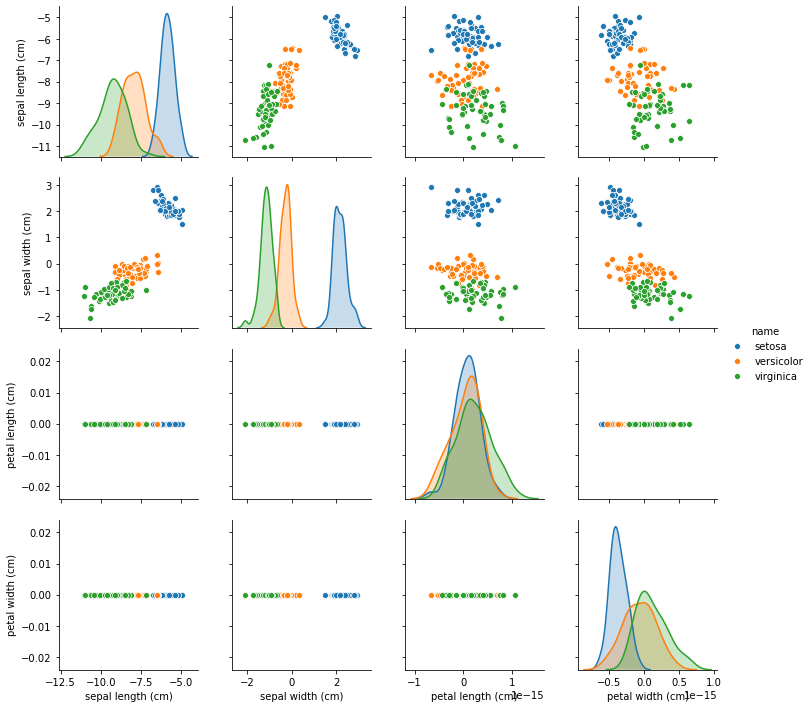

In [16]:
iris_frame_3 = DataFrame(C)
# обозначение колонок и целевых переменных
iris_frame_3.columns = iris.feature_names
# целевая переменная
iris_frame_3['target'] = iris.target
#для наглядности столбец с сортами
iris_frame_3['name'] = iris_frame_3.target.apply(lambda x : iris.target_names[x])

sns.pairplot(iris_frame_3[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

In [46]:
#обучаем модель на новом датасете 
from sklearn.linear_model  import  LinearRegression
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_frame_3[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']],
    iris_frame_3[['target']], test_size = 0.3)
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

0.13333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        16
           2       1.00      0.55      0.71        11

    accuracy                           0.13        45
   macro avg       0.33      0.18      0.24        45
weighted avg       0.24      0.13      0.17        45



**Точность прогноза %**

**PCA - Principal Component Analysis**

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
pca.fit(iris.data)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [20]:
new_iris_pca = pca.fit_transform(iris.data)

In [21]:
iris_frame_pca = DataFrame(new_iris_pca)
# обозначение колонок и целевых переменных
iris_frame_pca.columns = iris.feature_names[:2]
iris_frame_pca['target'] = iris.target
iris_frame_pca['name'] = iris_frame_pca.target.apply(lambda x : iris.target_names[x])
iris_frame_pca

,sepal length (cm),sepal width (cm),target,name
0,-2.684126,0.319397,0,setosa
1,-2.714142,-0.177001,0,setosa
2,-2.888991,-0.144949,0,setosa
3,-2.745343,-0.318299,0,setosa
4,-2.728717,0.326755,0,setosa
...,...,...,...,...
145,1.944110,0.187532,2,virginica
146,1.527167,-0.375317,2,virginica
147,1.764346,0.078859,2,virginica
148,1.900942,0.116628,2,virginica


In [22]:
#обучаем модель на новом датасете 
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_frame_pca[['sepal length (cm)','sepal width (cm)']],
    iris_frame_pca[['target']], test_size = 0.3)
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

0.24444444444444444
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        17
           2       0.85      0.69      0.76        16

    accuracy                           0.24        45
   macro avg       0.28      0.23      0.25        45
weighted avg       0.30      0.24      0.27        45



**Точность % при использовании PCA и % при SVD разложении матриц**

In [23]:
## Ниже представлена первоначальная модель для сравнения
model = KMeans(n_clusters=3)
model.fit(new_iris)
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])
print(predicted_label)

[1]


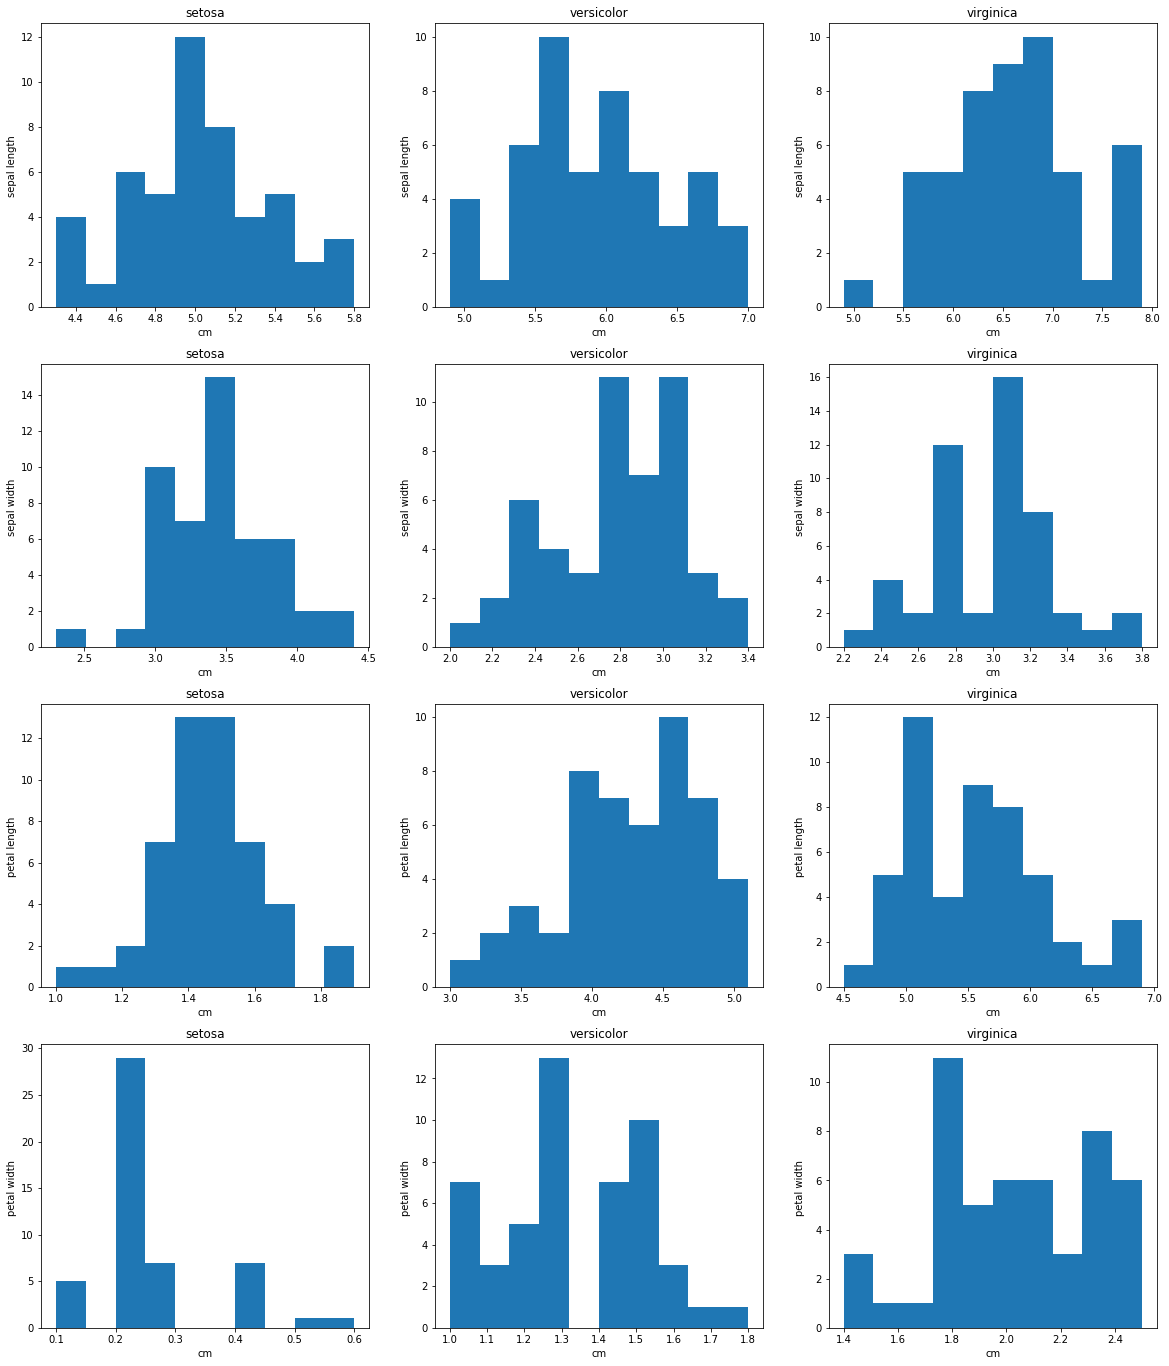

In [24]:
# Статистика: гистограмма по каждому признаку: 
pyplot.figure(figsize(20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
       plot_number += 1
       pyplot.subplot(4, 3, plot_number)
       pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
       pyplot.title(target_name)
       pyplot.xlabel('cm')
       pyplot.ylabel(feature_name[:-4])

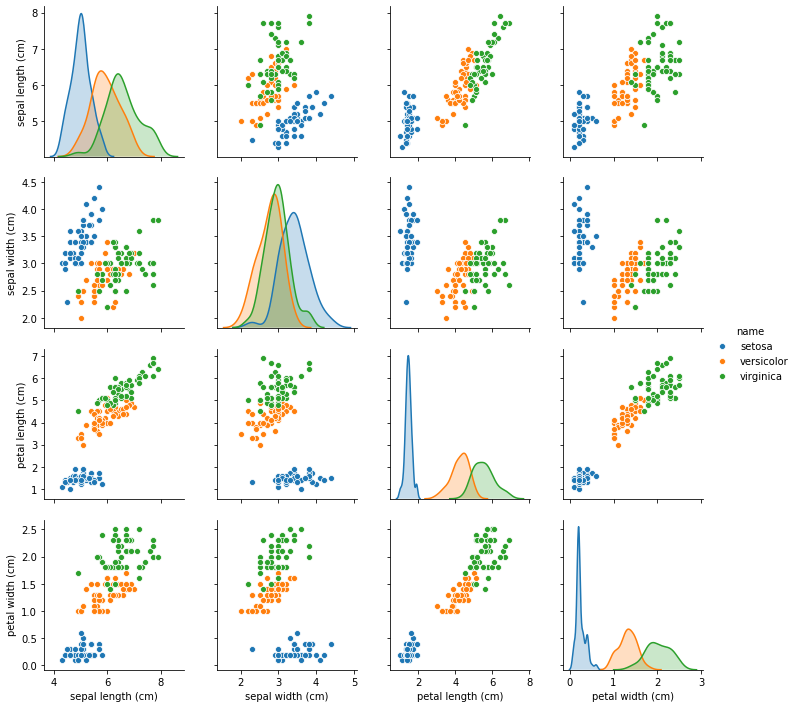

In [25]:
import seaborn as sns

sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

меньше всего сорта перемешаны при использовании признака petal width и petal length

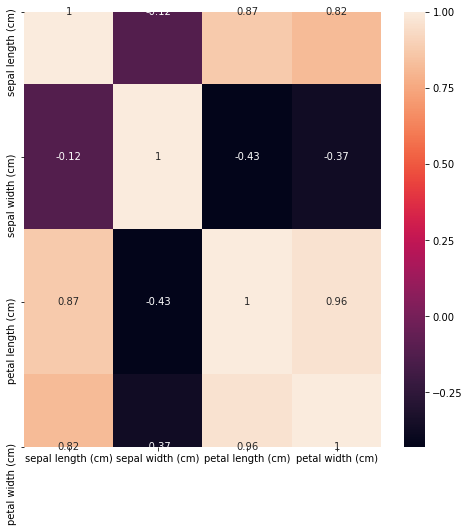

In [26]:
import seaborn as sns

corr = iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
mask = np.zeros_like(corr)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, annot=True, ax=ax)

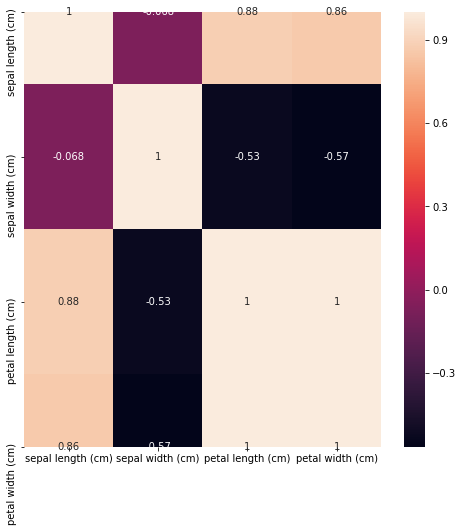

In [27]:
corr = iris_frame_2[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
mask = np.zeros_like(corr)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, annot=True, ax=ax)

In [28]:
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_frame[['petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3, random_state = 0)
train_data

,petal length (cm),petal width (cm)
60,3.5,1.0
116,5.5,1.8
144,5.7,2.5
119,5.0,1.5
108,5.8,1.8
...,...,...
9,1.5,0.1
103,5.6,1.8
67,4.1,1.0
117,6.7,2.2


Кластеризация — K-means

In [29]:
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

0.2222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        18
           2       0.91      0.91      0.91        11

    accuracy                           0.22        45
   macro avg       0.30      0.30      0.30        45
weighted avg       0.22      0.22      0.22        45



In [30]:
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']],
    iris_frame[['target']], test_size = 0.3)
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

0.17777777777777778
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        17
           2       0.80      0.73      0.76        11

    accuracy                           0.18        45
   macro avg       0.27      0.24      0.25        45
weighted avg       0.20      0.18      0.19        45



какая-то чудовищно низкая точность Ж(